# Solutions to Practice Problems based on Week 5 content

## General Course Logistics

* Work on your project! This week you should finish builiding your math model and begin implementing it. It's also a goode idea to work on the report -- write as you go! This will save you a lot of time at the end of the project. Write up your introduction and background. Start filling in the details about your model.


## Convex Programming


### Convex Programming Theory

In Module 10, Lecture 7, we prove that the set of optimal solutions to a convex program is itself a convex set. Use that fact to prove that any locally optimal solution to a convex program is also a globally optimal solution.

### Answer

Proof sketch:

* Let $f(x)$ be a convex function we are minimizing over a convex feasible region.
* Suppose $\hat{x}$ is a local optimum. In other words, $\exists \epsilon > 0$ such that $f(\hat{x}) \leq f(x) \forall x \in B_{\epsilon}(\hat{x})$ ($B_{\epsilon}(x)$ is a ball of radius $\epsilon$ centered at $x$). 
* We will use contraction. Suppose $\exists$ y that is feasible to the convex program, but $f(y) < f(\hat{x})$. 
* We know the set of feasible points is convex. Therefore, $\lambda\hat{x} + (1-\lambda)y$ is feasible for any $\lambda \in [0,1]$. 
* By convexity of $f$, we know $f(\lambda\hat{x} + (1-\lambda)y) \leq \lambda f(\hat{x}) + (1-\lambda)f(y)$.
* Furthermore, by our assumption we must have $\lambda f(\hat{x}) + (1-\lambda)f(y) < \lambda f(\hat{x}) + (1-\lambda)f(\hat{x}) = f(\hat{x})$.
* Let $\lambda \rightarrow 1$. For sufficiently large $\lambda$, we know $\lambda\hat{x} + (1-\lambda)y \in B_{\epsilon}(\hat{x})$. 
* Therefore, for some choice of $\lambda \in [0,1]$, $f(\lambda\hat{x} + (1-\lambda)y) < f(\hat{x})$. This contradicts our initial supposition that $\hat{x}$ is a local optimum. Thus, our assumption that $\exists  y$ that is feasible to the convex program, but $f(y) < f(\hat{x})$ must be invalid and we are done!

### Small circles

Suppose we are given a set of points $(x_i,y_i) \in \mathbb{R}^2$. We would like to find the smallest circle that contains all the points. How can we model this as an optimization problem with a convex objective function? You can test your model by generating $n$ random points with 


In [1]:
X = 4 .+ randn(2,50);

This is a 2x50 matrix where each column is one of the points. Produce a plot of the randomly generated points and the enclosing sphere of smallest area.

Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-17


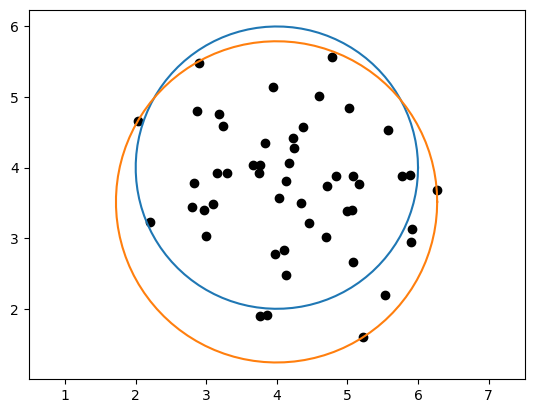

In [2]:
### Note: You can use the code below to get started by generating points and plotting one possible circle

using PyPlot
X = 4 .+ randn(2,50) # generate 50 random points
t = range(0,stop=2*pi,length=100) # parameter that traverses the circle
r = 2; x = 4; y = 4 # radius and coordinates of the center
plot( x .+ r*cos.(t), y .+ r*sin.(t)) # plot circle radius r with center (x1,x2)
scatter( X[1,:], X[2,:], color="black") # plot the 50 points
axis("equal"); # make x and y scales equal

using JuMP, Gurobi

m = Model(Gurobi.Optimizer)
set_optimizer_attribute(m, "OutputFlag",0)

@variable(m, x[1:2]) # variable for coordinates of circle center
@variable(m, d >= 0) # variable representing r^2

@objective(m, Min, π*d) # we want to minimize the area (this is linear, so it is convex AND concave)

@constraint(m, constr[i in 1:50], (x[1] - X[1,i])^2 + (x[2] - X[2,i])^2 <= d)

optimize!(m)

t = range(0,stop=2pi,length=100) # parameter that traverses the circle
# plot circle radius r = sqrt(d) with center (x1,x2); (orange circe)
plot( value(x[1]) .+ sqrt(value(d))*cos.(t), value(x[2]) .+ sqrt(value(d))*sin.(t)) 
;

## Integer Programming Basics

### Basic IP Modeling

You're trying to pack as many souvenirs as possible to bring home from your
trip, but your suitcase has a limited capacity. It can hold a maximum of 30 pounds of weight and
15 gallons of volume. Which souvenirs should you pack? The weights and volumes are as follows:


| Souvenir Number | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
|-----------------|---|---|---|---|---|---|---|---|---|----|
| Weight          | 5 | 6 | 7 | 6 | 4 | 6 | 7 | 3 | 8 | 5  |
| Volume          | 2 | 4 | 5 | 3 | 3 | 2 | 3 | 1 | 2 | 4  |

### Answer

In [3]:
using JuMP, Gurobi

max_weight = 30
max_vol = 15

weights = Dict(zip(1:10,[5 6 7 6 4 6 7 3 8 5]))
vols = Dict(zip(1:10,[2 4 5 3 3 2 3 1 2 4]))

m = Model(Gurobi.Optimizer)
set_optimizer_attribute(m,"OutputFlag",0)

@variable(m, x[1:10], Bin) # binary variable for choosing each item

# bring as many souvenirs as you can
@objective(m, Max, sum(x))

# weight limit
@constraint(m, sum(weights[i]*x[i] for i in 1:10) <= max_weight)

# volume limit
@constraint(m, sum(vols[i]*x[i] for i in 1:10) <= max_vol)

optimize!(m)

println("bring these souvenirs: ")
for i in 1:10
    if value(x[i]) == 1
        println(i)
    end
end

Academic license - for non-commercial use only - expires 2022-06-27
bring these souvenirs: 
1
4
5
6
8
10


### Fixed Cost Practice

Comquat owns four production plants at which personal computers are
produced. Comquat can sell up to 20,000 computers per year at a price of \$3,500 per computer. For
each plant the production capacity, cost per computer, and fixed cost of operating the plant for a year
are given below. Determine how Comquat can maximize its yearly profit from computer production.

| Plant | Production capacity | Fixed Cost (\$ Million) | Per computer cost (\$) |
|-------|---------------------|-------------------------|------------------------|
| 1     | 10,000              | 9                       | 1,000                  |
| 2     | 8,000               | 5                       | 1,700                  |
| 3     | 9,000               | 3                       | 2,300                  |
| 4     | 6,000               | 1                       | 2,900                  |

* Find at least two different valid choices of your big-Ms. What's the smallest big-M you can find?

### Answer

In [4]:
using JuMP, Gurobi

plant = [:1, :2, :3, :4]

prod_cap = Dict(zip(plant,[10, 8, 9, 6]*1000))
fixed_costs = Dict(zip(plant,[9, 5, 3, 1]*10e5))
var_costs = Dict(zip(plant,[1000,1700,2300,2900]))

# choices for big-M will vary. I will use the production capacity of each plant (a natural upper bound on x).
bigM = prod_cap

m = Model(Gurobi.Optimizer)
set_optimizer_attribute(m,"OutputFlag",0)

@variable(m, x[plant] >= 0, Int) # integer variable for number of computers produced at each plant
@variable(m, z[plant], Bin) # binary variable for using each possible plant

# maximize profit
@objective(m, Max, 3500*sum(x) - sum(z[i]*fixed_costs[i] for i in plant) - sum(x[i]*var_costs[i] for i in plant))

# total prodution cap (based on demand)
@constraint(m, sum(x) <= 20000)

# individual plant capacity (also big-M)
@constraint(m, cap[i in plant], x[i] <= bigM[i]*z[i])

optimize!(m)

println("Produce as follows: ")
for i in plant
    if value(z[i]) == 1
        println(value(x[i]), " computers at plant ", i)
    end
end


Academic license - for non-commercial use only - expires 2022-06-27
Produce as follows: 
10000.0 computers at plant 1
8000.0 computers at plant 2
2000.0 computers at plant 4
